[View in Colaboratory](https://colab.research.google.com/github/tomwilde/100DaysOfMLCode/blob/master/2_numpy_linearRegression_with_CostFn.ipynb)

In [0]:
!pip install -U -q PyDrive

import numpy as np
import matplotlib.pyplot as plt
import pandas
import io


# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
# from: https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#cost-function
#
# We need a cost fn and its derivative...

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1_d2opSoZgMsSeoQUjtOcRQj5l0zO-Upi'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

dataset = pandas.read_csv(io.StringIO(downloaded.GetContentString())).as_matrix()

In [0]:
def cost_function(X, y, weight, bias):
    n = len(X)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (weight*X[i] + bias))**2
    return total_error / n

In [0]:
def update_weights(X, y, weight, bias, alpha):
    weight_deriv = 0
    bias_deriv = 0
    n = len(X)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*X[i] * (y[i] - (weight * X[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight * X[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / n) * alpha
    bias -= (bias_deriv / n) * alpha

    return weight, bias

In [0]:
def train(X, y, weight, bias, alpha, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(X, y, weight, bias, alpha)

        #Calculate cost for auditing purposes
        cost = cost_function(X, y, weight, bias)
        # cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
          print "iter: "+str(i) + " weight: "+str(weight) +" bias: "+str(bias) + " cost: "+str(cost)

    return weight, bias #, cost_history

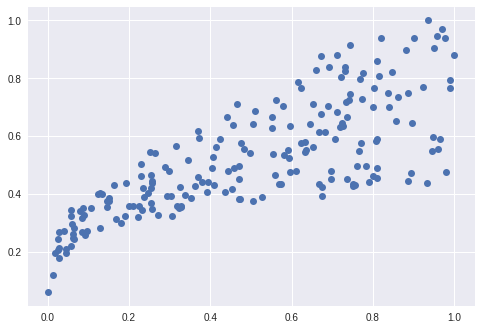

In [253]:
# work out 
y = dataset[:,4].reshape(200,1)
X = dataset[:,1].reshape(200,1)

m = 0
c = 0

alpha = 0.1
iters = 100

# normalise the data
y = y/np.linalg.norm(y, ord=np.inf, axis=0, keepdims=True)
X = X/np.linalg.norm(X, ord=np.inf, axis=0, keepdims=True)

In [256]:
weight, bias = train(X, y, m, c, alpha, iters)

iter: 0 weight: [0.06024246] bias: [0.10387037] cost: [0.18089265]
iter: 10 weight: [0.25442336] bias: [0.38069542] cost: [0.02054556]
iter: 20 weight: [0.29515622] bias: [0.37969695] cost: [0.01875648]
iter: 30 weight: [0.32379468] bias: [0.36560545] cost: [0.0177426]
iter: 40 weight: [0.34848476] bias: [0.35255119] cost: [0.01696661]
iter: 50 weight: [0.37007888] bias: [0.3410839] cost: [0.01637189]
iter: 60 weight: [0.38898224] bias: [0.33104279] cost: [0.01591609]
iter: 70 weight: [0.40553104] bias: [0.32225223] cost: [0.01556676]
iter: 80 weight: [0.42001862] bias: [0.31455656] cost: [0.01529904]
iter: 90 weight: [0.43270172] bias: [0.30781941] cost: [0.01509385]


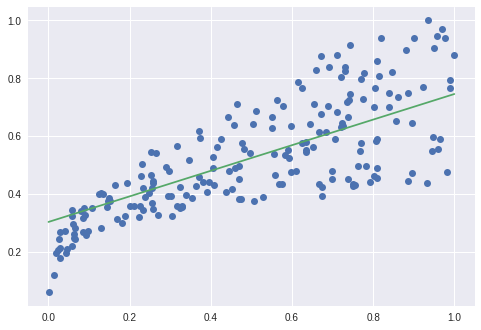

In [268]:
_ = plt.plot(X,y, 'o', [0, 1], [bias, weight + bias], '-')